In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

# Global options
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")
sns.set_context('notebook', font_scale=1.2)

In [2]:
filename = './data/top_100_canadian_beers_with_city.csv'
df = pd.read_csv(filename)

print(df.head())

   rank                                      name                  brewery                             style   abv  score  ratings          city          province
0     1                              Péché Mortel  Brasserie Dieu du Ciel!  American Double / Imperial Stout   9.5   4.39     5087  Saint-Jérôme            Quebec
1     2  Péché Mortel En Fût De Bourbon Américain  Brasserie Dieu du Ciel!  American Double / Imperial Stout   9.5   4.45      488  Saint-Jérôme            Quebec
2     3                           La Fin Du Monde                 Unibroue                            Tripel   9.0   4.31    10021       Chambly            Quebec
3     4                Unibroue 17 Grande Réserve                 Unibroue           Belgian Strong Dark Ale  10.0   4.24     1140       Chambly            Quebec
4     5                               Fat Tug IPA        Driftwood Brewery                      American IPA   7.0   4.25      601      Victoria  British Columbia


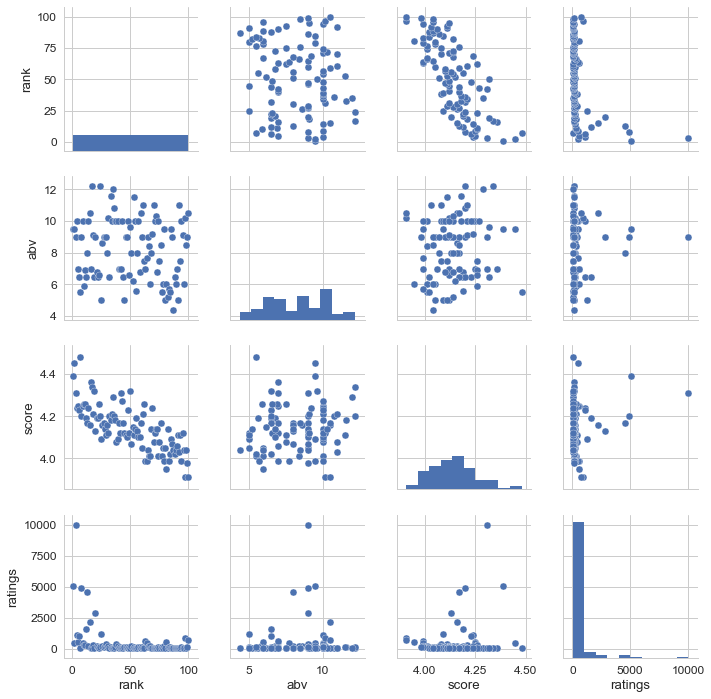

In [3]:
# Easy initial plot to look for any obvious relationships between pairs of numeric variables
sns.pairplot(df)

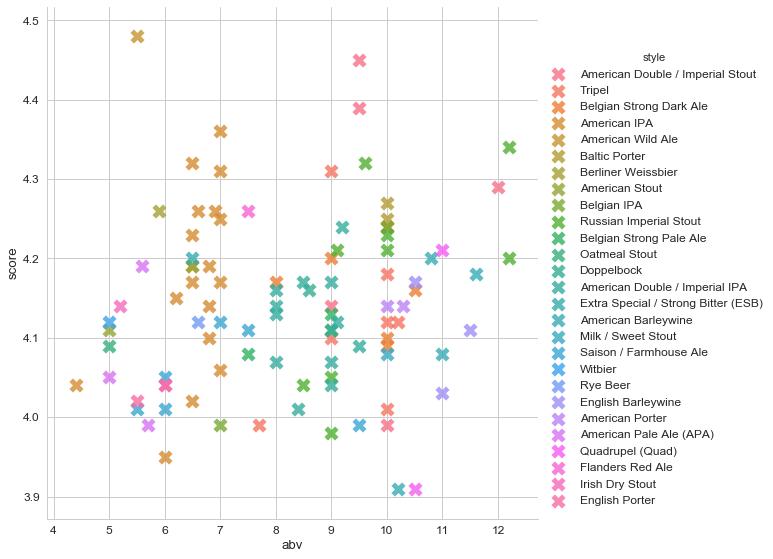

In [26]:
# Let's look at any relationship between score, ABV, and style
sns.lmplot(x='abv', y='score', hue='style', data=df, fit_reg=False, markers='X', size=8, scatter_kws={'alpha':0.8, 's':200})

In [5]:
# bin the beer styles
beer_families = {
    'barleywine': ['American Barleywine', 'English Barleywine'],
    'belgian dark ales': ['Belgian Strong Dark Ale', 'Quadrupel (Quad)'],
    'IPA': ['American Double / Imperial IPA', 'American IPA', 'Belgian IPA'],
    'pale ale': ['American Pale Ale (APA)', 'Belgian Strong Pale Ale'],
    'porter/stout': ['American Porter', 'Baltic Porter', 'English Porter', 'American Double / Imperial Stout', 'American Stout', 'Irish Dry Stout', 'Milk / Sweet Stout', 'Oatmeal Stout', 'Russian Imperial Stout'],
    'saison': ['Saison / Farmhouse Ale'],
    'tripel': ['Tripel'],
    'wheat beer': ['Berliner Weissbier', 'Witbier'], 
    # Uncategorized
    # American Wild Ale
    # Doppelbock
    # Extra Special / Strong Bitter (ESB)
    # Flanders Red Ale
    # Rye Beer
}

def get_beer_family(style):
    family = [k for k, v in beer_families.items() if style in v]
    return next(iter(family), 'Other')
    
df['family'] = df['style'].apply(lambda x: get_beer_family(x))

,rank,name,brewery,style,abv,score,ratings,city,province,family
0,1,Péché Mortel,Brasserie Dieu du Ciel!,American Double / Imperial Stout,9.5,4.39,5087,Saint-Jérôme,Quebec,porter/stout
1,2,Péché Mortel En Fût De Bourbon Américain,Brasserie Dieu du Ciel!,American Double / Imperial Stout,9.5,4.45,488,Saint-Jérôme,Quebec,porter/stout
2,3,La Fin Du Monde,Unibroue,Tripel,9.0,4.31,10021,Chambly,Quebec,tripel
3,4,Unibroue 17 Grande Réserve,Unibroue,Belgian Strong Dark Ale,10.0,4.24,1140,Chambly,Quebec,belgian dark ales
4,5,Fat Tug IPA,Driftwood Brewery,American IPA,7.0,4.25,601,Victoria,British Columbia,IPA
5,6,Red Racer IPA (India Pale Ale),Central City Brewers + Distillers,American IPA,6.5,4.23,1085,Surrey,British Columbia,IPA
6,7,Nectarous,Four Winds Brewing Co.,American Wild Ale,5.5,4.48,92,Delta,British Columbia,Other
7,8,Trois Pistoles,Unibroue,Belgian Strong Dark Ale,9.0,4.20,4938,Chambly,Quebec,belgian dark ales
8,9,Grande Cuvée Porter Baltique,Les Trois Mousquetaires,Baltic Porter,10.0,4.25,451,Brossard,Quebec,porter/stout
9,10,Solstice D'été Aux Framboises,Brasserie Dieu du Ciel!,Berliner Weissbier,5.9,4.26,350,Saint-Jérôme,Quebec,wheat beer


In [6]:
df.family.value_counts()

IPA                  33
porter/stout         27
belgian dark ales     8
tripel                7
barleywine            7
saison                6
pale ale              5
Other                 5
wheat beer            2
Name: family, dtype: int64

In [7]:
# mark any beers with 5 or less entries as Other
threshold = 5
df = df.apply(lambda x: x.mask(x.map(x.value_counts())<=threshold, 'other') if x.name=='family' else x)
print(df.family.value_counts())

IPA                  33
porter/stout         27
other                12
belgian dark ales     8
tripel                7
barleywine            7
saison                6
Name: family, dtype: int64


In [8]:
# Categorize the family name so it will be treated in a certain order

# create the category orders, sorted alphabetically
sorted_family_index = df.family.drop_duplicates().str.lower().sort_values().index
family_order = df.family.iloc[sorted_family_index]

# move 'other' to end of categories
family_order = family_order[family_order != 'other']
family_order = family_order.append(pd.Series('other'))

df.family = df.family.astype('category', ordered=True, categories=family_order)

In [9]:
# Create custom color palette with grey as the color for Other
family_palette = sns.color_palette('Set1', len(df.family.cat.categories)-1)
family_palette.append(sns.xkcd_rgb["grey"])  # 'other' category

# Set palette as default
sns.set_palette(family_palette)

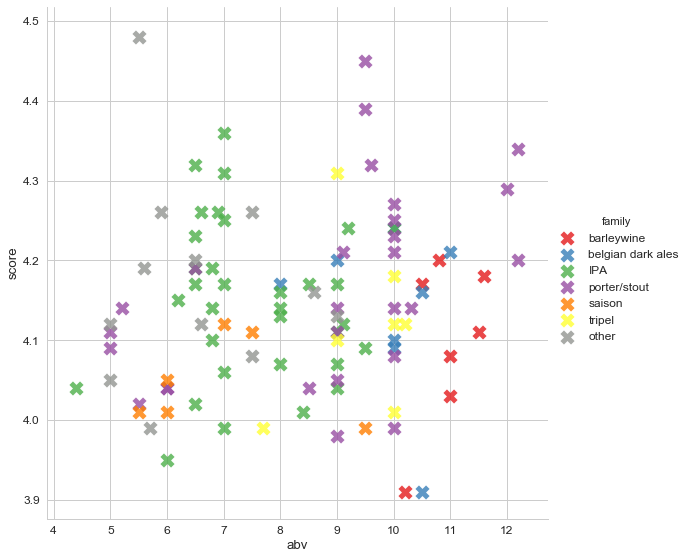

In [23]:
sns.lmplot(x='abv', y='score', hue='family', data=df, fit_reg=False, markers='X', size=8, scatter_kws={'alpha':0.8, 's':200})

In [11]:
# list of styles in the 'other' family
list(df.loc[df['family'] == 'other']['style'].unique())

['American Wild Ale',
 'Berliner Weissbier',
 'Belgian Strong Pale Ale',
 'Doppelbock',
 'Extra Special / Strong Bitter (ESB)',
 'Witbier',
 'Rye Beer',
 'American Pale Ale (APA)',
 'Flanders Red Ale']

In [12]:
# list styles in a particular family
beer_families.get('barleywine')

['American Barleywine', 'English Barleywine']

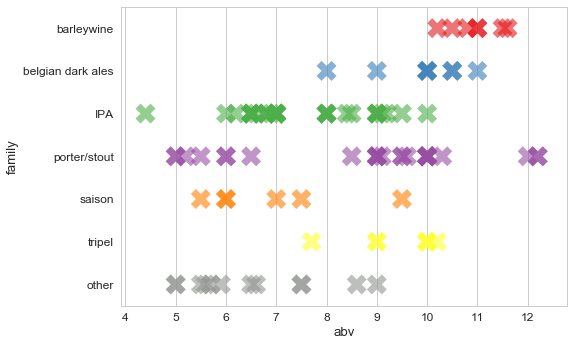

In [24]:
# scatterplot of family vs abv
sns.stripplot(x="abv", y="family", data=df, marker='X', alpha=0.6, size=20);

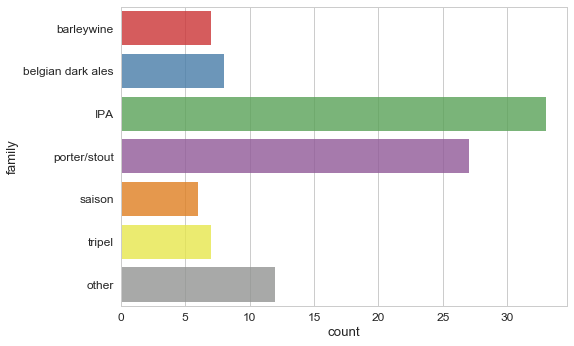

In [14]:
# bar plot of family
sns.countplot(y='family', data=df, alpha=0.8)

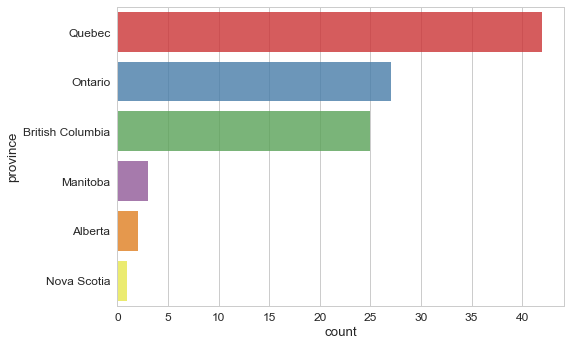

In [15]:
# provinces and beers
sns.countplot(y='province', data=df, order=df.province.value_counts().index, alpha=0.8)

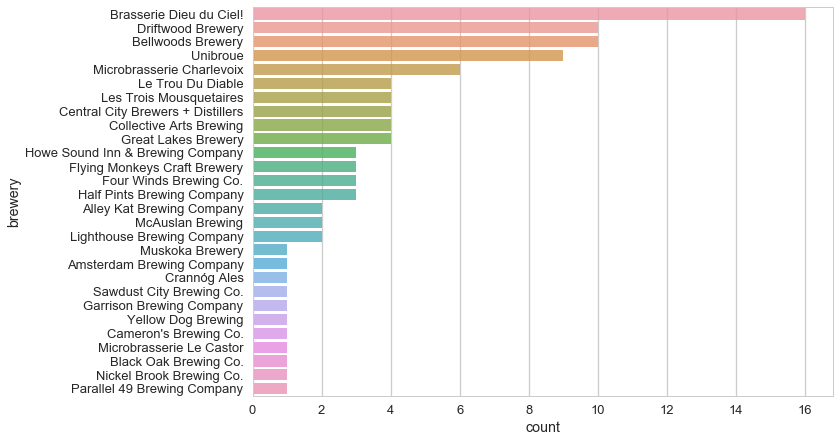

In [16]:
# top breweries
with sns.plotting_context("talk"):
    sns.countplot(y='brewery', data=df, order=df.brewery.value_counts().index, alpha=0.8)

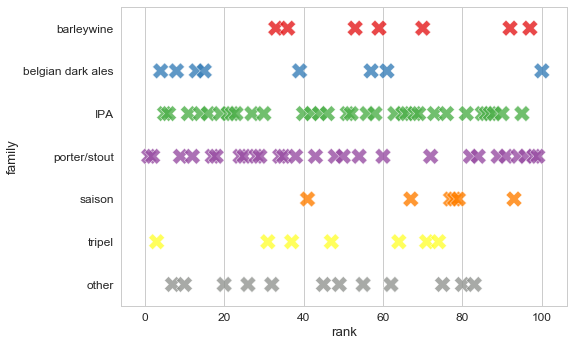

In [25]:
# rank and style
sns.stripplot(x="rank", y="family", data=df, jitter=False, alpha=0.8, marker='X', size=16, edgecolor='white', linewidth=0.5);